# Introduction to Machine-Learning Practical
In this practical, I will try to show you how to create a machine-learning model to predict the diabetes risk of a person.  
We will perform data exploration, data processing, model training and evaluation and finally, fine-tuning.  
At different parts of this practical, I will add screenshots of the lecture that I did at the beginning of the year to remind you of the concepts.  

### Context
We will use the Diabetes dataset, a survey of more than 70,000 american people with 17 measurements per person and if they have diabetes or not. For the sake of this practical, I reduced the dataset to ~5,500 people.  
**Today we will try to build a machine-learning model that can predict if a person will likely develop diabetes or not.**  
If you want more details on the data you can find  them [here](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)  

<details><summary>We will use a total of 17 measurements to predict the diabetes risk. Click here to open the meaning of each column of the file</summary>
<p>
 <ul>
  <li><strong>Age:</strong> age of the person [18-95]</li>
  <li><strong>Sex:</strong> sex of the person [male, female]</li>
  <li><strong>High Chol:</strong> high level of cholesterol [yes, no]</li>
  <li><strong>CholCheck:</strong> cholesterol check in last 5 years [yes, no]</li>
  <li><strong>BMI:</strong> body mass index [15-100]</li>
  <li><strong>Smoker:</strong> does the person smoke ? [0-1]</li>
  <li><strong>HeartDiseaseorAttack:</strong> had heart issues [0-1]</li>
  <li><strong>PhysActivity:</strong> physical activity past 30 days [0-1]</li>
  <li><strong>Fruits:</strong> eat fruit every days [0-1]</li>
  <li><strong>Veggies:</strong> eat veggies every days [0-1]</li>
  <li><strong>HvyAlcoholConsump:</strong> heavy alcohol drinker [0-1]</li>
  <li><strong>GenHlth:</strong> self-assessed general health level [excellent, very good, good, fair, poor]</li>
  <li><strong>MentHlth:</strong> days of poor mental health during last month [0-30]</li>
  <li><strong>PhysHlth:</strong> days of physical illness last 30 days [0-30]</li>
  <li><strong>DiffWalk:</strong> difficulty walking or climbing stairs [0-1]</li>
  <li><strong>Stroke:</strong> already had a stroke: [0-1]</li>
  <li><strong>HighBP:</strong> high blood pressure [0-1]</li>
</ul>
</p>
</details>


In [1]:
# With this command, you can download the data we will use on the server. Simply run the cell.
!wget https://raw.githubusercontent.com/Dichopsis/ML-TP-ESBS/main/diabetes_data_TP.csv
import warnings
warnings.filterwarnings('ignore')

--2024-10-31 15:34:23--  https://raw.githubusercontent.com/Dichopsis/ML-TP-ESBS/main/diabetes_data_TP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443937 (434K) [text/plain]
Saving to: ‘diabetes_data_TP.csv’

diabetes_data_TP.cs 100%[===================>] 433.53K  --.-KB/s    in 0.06s   

2024-10-31 15:34:24 (7.50 MB/s) - ‘diabetes_data_TP.csv’ saved [443937/443937]



# A tip before starting
The most useful tip I can give you for this practical but also for code in general is that **everytime you are lost on how to use a function or what function to use, simply google "library_of_the_function name_of_the_function" and click this first result**. You will almost always have an example on how to use the function and all the parameters needed.  
For example:
* "scikit train_test_split" -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Part 1 - Data Exploration
### Tasks: explore the data
* import the data
* count the number of persons and visualize the 5 first line
* see diabetes vs non-diabetes person ratio
* plot a box-plot of the BMI and a histogram of the smokers
### Questions
1. How many persons are in this dataset ? (rows). How many features/measurements ? (columns)
2. What is the percentage of persons with diabetes ?
3. What is the median BMI of the persons in the dataset ? (approximately with BoxPlot)
4. Is there more non-smoker or smokers in the dataset ? (Histogram)  

![image](https://i.imgur.com/xLoQ27w.png)

In [2]:
# Pandas is the main library for data manipulation in Python
import pandas as pd
# Matplotlib is the main library for data visualization in Python
import matplotlib.pyplot as plt

# Import the data (df variable) using pd.read_csv()
df = pd.read_csv("diabetes_data_TP.csv")

print("=== QUESTION 1 ===")
# Print the shape of the dataframe and the head using df.shape and df.head()
print(df.shape)
df.head()

=== QUESTION 1 ===
(5631, 18)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,72.0,female,Yes,Yes,40.0,1.0,1.0,0.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,1.0,1.0
1,13.0,female,Yes,Yes,32.0,0.0,0.0,1.0,1.0,1.0,0.0,fair,0.0,5.0,0.0,0.0,1.0,1.0
2,67.0,female,No,Yes,20.0,1.0,0.0,0.0,1.0,1.0,0.0,very good,0.0,0.0,0.0,0.0,1.0,1.0
3,78.0,female,Yes,Yes,28.0,0.0,1.0,0.0,1.0,1.0,0.0,fair,0.0,0.0,1.0,0.0,1.0,1.0
4,56.0,female,Yes,Yes,28.0,0.0,0.0,1.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print("=== QUESTION 2 ===")
# Use value_counts() on the "stroke" column. To select a column, use df["column_name"]
# Tip: set the "normalize" parameter to True in the value_count() function !
print(df["Diabetes"].value_counts(normalize=True))

=== QUESTION 2 ===
Diabetes
0.0    0.917421
1.0    0.082579
Name: proportion, dtype: float64


=== QUESTION 3 ===


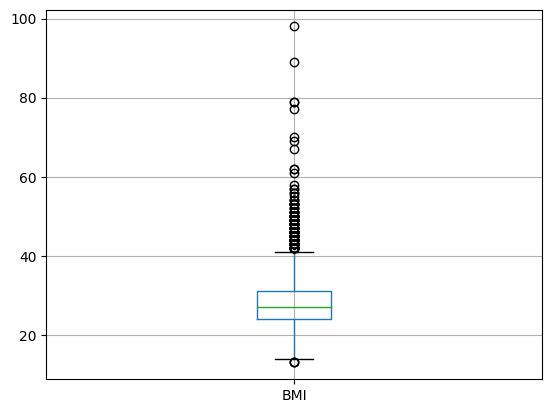

In [4]:
print("=== QUESTION 3 ===")
# Make a boxplot of the "BMI" column using the boxplot() function on the dataframe with the parameter "column"="column_name"
boxplot = df.boxplot(column="BMI")
# We use plt.show() to display the boxplot
plt.show(boxplot)

=== QUESTION 4 ===


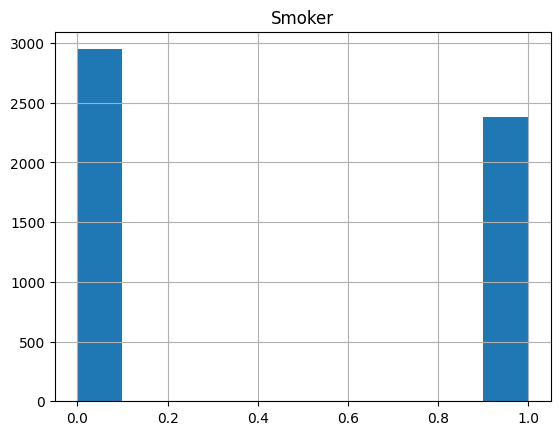

In [5]:
print("=== QUESTION 4 ===")
# Make a histogram of the "Smoker" column using the hist() function on the dataframe with the parameter "column"="column_name"
hist = df.hist(column="Smoker")
# We use plt.show() to display the histogram
plt.show(hist)

# Part 2 - Data Processing and splitting
### Tasks: encode the data to be usable for training by a ML algorithm
* analyze what columns we need to process and modify them to do machine-learning !
* split our dataset between a training dataset and a test dataset

### Questions
1. What columns are categorical data, what columns are numeric.
2. What columns are already ready to be used and need no change?
3. What type of processing do you need to do on categorical data and why
4. What type of processing do you need to do on numeric data and why
5. What columns contains missing data ? What type of processing do you need to do in this case.

![image](https://i.imgur.com/HbEoLeR.png)


In [6]:
print("=== QUESTION 1 to 4 ===")
# You should be able to answer questions 1 to 4 simply with the table below (df.head())
df.head()

=== QUESTION 1 to 4 ===


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,72.0,female,Yes,Yes,40.0,1.0,1.0,0.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,1.0,1.0
1,13.0,female,Yes,Yes,32.0,0.0,0.0,1.0,1.0,1.0,0.0,fair,0.0,5.0,0.0,0.0,1.0,1.0
2,67.0,female,No,Yes,20.0,1.0,0.0,0.0,1.0,1.0,0.0,very good,0.0,0.0,0.0,0.0,1.0,1.0
3,78.0,female,Yes,Yes,28.0,0.0,1.0,0.0,1.0,1.0,0.0,fair,0.0,0.0,1.0,0.0,1.0,1.0
4,56.0,female,Yes,Yes,28.0,0.0,0.0,1.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
print("=== QUESTION 5 ===")
# You should be able to answer the question 5 simply with the table below (df.info())
# (remember how many rows there are in the dataframe)
df.info()

=== QUESTION 5 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5631 non-null   float64
 1   Sex                   5631 non-null   object 
 2   HighChol              5631 non-null   object 
 3   CholCheck             5631 non-null   object 
 4   BMI                   5233 non-null   float64
 5   Smoker                5328 non-null   float64
 6   HeartDiseaseorAttack  5631 non-null   float64
 7   PhysActivity          5631 non-null   float64
 8   Fruits                5631 non-null   float64
 9   Veggies               5631 non-null   float64
 10  HvyAlcoholConsump     5631 non-null   float64
 11  GenHlth               5631 non-null   object 
 12  MentHlth              5631 non-null   float64
 13  PhysHlth              5631 non-null   float64
 14  DiffWalk              5631 non-null   float64
 15  St

In [8]:
# We will now process theses columns to make them usable
# From Scikit learn we import the tools we will need
# OrdinalEncoder for the categorical variables
# StandardScaler for the numerical variables
# IterativeImputer for the missing values
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# NumPy is the main library for array manipulation in Python
import numpy as np

# Create lists with columns names for each processing categories
columns_nothing_to_do = ["Smoker","HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "DiffWalk", "Stroke", "HighBP", "Diabetes"] # 10 Columns
categorical_columns_to_process = ["Sex", "HighChol", "CholCheck", "GenHlth"] # 4 Columns
numerical_columns_to_process = ["Age", "BMI", "MentHlth", "PhysHlth"] # 4 Columns


# Categorical data to numeric: do one hot encoding ( OrdinalEncoder(), .fit_transform() )
# I give you the OrdinalEncoder example. Do something similar for the Scaling of numerics data !
X_cat = df[categorical_columns_to_process]
X_cat_enc = OrdinalEncoder().fit_transform(X_cat)

# Numeric data: do scaling (-1,+1) (StandardScaler() and .fit_transform())
X_num = df[numerical_columns_to_process]
X_num_scaled = StandardScaler().fit_transform(X_num)

# Nothing-To-Do Cols: just select the data corresponding with df[name_of_the_list] and store it into X_nothing_to_do
# Then convert X_nothing_to_do to numpy array with .to_numpy()
X_nothing_to_do = df[columns_nothing_to_do]
X_nothing_to_do = X_nothing_to_do.to_numpy()

# Combine the X_cat_enc, X_num_scaled, and X_nothing_to_do data into a single array (array_data)
# using np.concatenate((array1, array2, array3), parameters) ; TIP: Care for the axis parameter (axis=1)
array_data = np.concatenate((X_cat_enc, X_num_scaled, X_nothing_to_do), axis=1)

# Finally handle Missing Data: Use imputer to predict them ( IterativeImputer() and .fit_transform() on array_data just as before
array_data = IterativeImputer().fit_transform(array_data)

# You can recreate a DataFrame for pretty printing, but this is optional. I give you the code it's a bit ugly.
df_data = pd.DataFrame(data=array_data, columns=list(X_cat.columns) + list(X_num.columns) + list(df[columns_nothing_to_do].columns))
df_data.head()

,Sex,HighChol,CholCheck,GenHlth,Age,BMI,MentHlth,PhysHlth,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Stroke,HighBP,Diabetes
0,0.0,1.0,1.0,2.0,1.146139,1.902009,-0.426205,-0.470133,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0,-2.179834,0.622491,-0.426205,0.124957,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,4.0,0.864277,-1.296787,-0.426205,-0.470133,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.484374,-0.017268,-0.426205,-0.470133,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,1.0,2.0,0.244180,-0.017268,-0.426205,-0.470133,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### Tasks: Split our dataset between train and test set
* split our processed data into train and test dataset

### Questions
1. What train/test ratio should you use.
2. How many entries are in your train dataset and in your test dataset.
3. Verify that you have the same diabetes/diabetes ratio between train and test dataset.


In [9]:
from sklearn.model_selection import train_test_split
# From your numpy array that you created, separate the X columns (features: multiples columns) and the Y column (label: last column) in two variables
# Call them X and Y, X contains all the columns except the last one, Y contains only the last column from the array_data variable.
X = array_data[:,:-1]
Y = array_data[:,-1]

# Use train_test_split() using X and Y with the ratio you selected. The parameter test_size= is the ratio of the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=777)

# Print X_train and X_test shape, use np.unique() on Y_train and Y_test to get the diab vs no diab ratio
print(X_train.shape)
print(X_test.shape)
print(np.unique(Y_train, return_counts=True)[1])
print(np.unique(Y_test, return_counts=True)[1])

(4223, 17)
(1408, 17)
[3885  338]
[1281  127]


# Part 3 - Create your machine-learning model
### Tasks: Choose a model and do basic evaluation

Select from scikit-learn a model and train it (.fit()) with the train data. Then calculate the accuracy of the model on the test data (.score()). Plot the confusion matrix of the test data classification.  
All ML algorithm in Sci-kit can be found here (1.1 to 1.11) https://scikit-learn.org/stable/supervised_learning.html  
Personally I will use a RandomForest or a Decision Tree for example.

### Questions:

1. Which model did you choose and why ? Have you set any particular (hyper)parameters ?
2. What accuracy-score do you get and what conclusion can you take ?
3. What do you observe on the confusion matrix and what conclusion can you take ?

![image](https://i.imgur.com/JttOOSw.png)

=== QUESTION 2-3 ===
0.9083806818181818


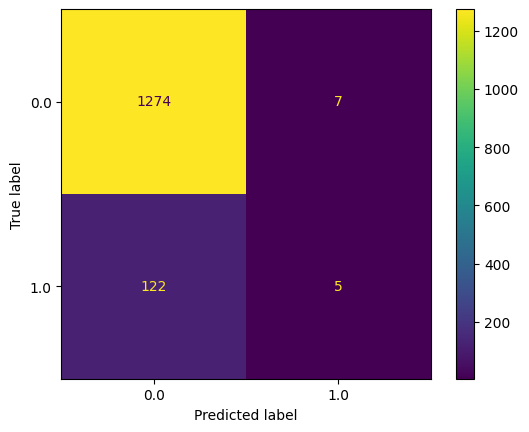

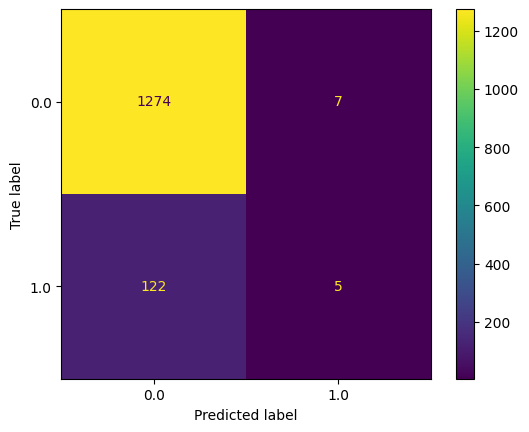

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Select a model from: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# For example: create a clf variable containing a RandomForestClassifier() or DecisionTreeClassifier().
# If you select another model, you will have to import it first (look above)
# Don't hesitate to tweak its parameters as you like ! You can experiment.
# Use .fit() on clf variable with your X_train and Y_train to train the model.
clf = RandomForestClassifier().fit(X_train, Y_train)

print("=== QUESTION 2-3 ===")
# Using the .score() method of the clf variable (your trained model), print its accuracy on X_test, Y_test
print(clf.score(X_test, Y_test))
# Plot the confusion matrix using ConfusionMatrixDisplay.from_estimator() with clf, X_test, Y_test arguments)
display = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)
plt.show(display.plot())


### Tasks: Correct the previous issue

You will now try to downsample your majority class (non-diabetes) to the level of minority class (diabetes) to have a 50/50 ratio and re-do a train/test split.  
Then you will re-train a new model with the new ratio-corrected data and get accuracy+confusion matrix plot. Don't only predict the class, but also show the prediction probability for all data in the test set !

### Questions

1. What accuracy-score do you get with the new model and what conclusion can you take.
2. What do you observe on the confusion matrix and what conclusion can you take?
3. Did you manage to print the probability of each prediction ? What's the shape of the prediction probability output ? Is there a high variance between the different test entries in probability ?

![image](https://i.imgur.com/D6iAllf.png)

Graphical Recap of what we did so far and what we are going to do ! Because there is a lot of variable and it's easy to be lost.  
  
![image](https://i.imgur.com/I8FyMhD.png)


=== QUESTION 1-3 ===
0.7123655913978495


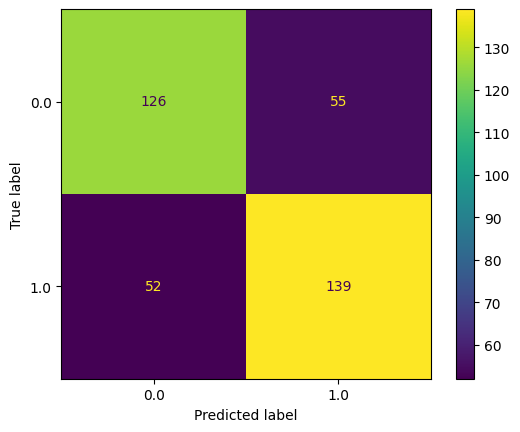

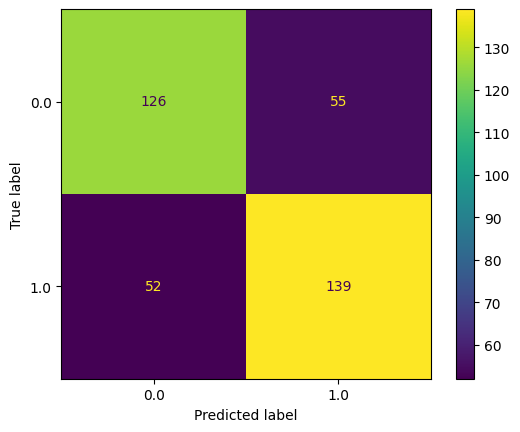

array([[0.26, 0.74],
       [0.46, 0.54],
       [0.83, 0.17],
       [0.54, 0.46],
       [0.17, 0.83],
       [0.63, 0.37],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.71, 0.29]])

In [11]:
# So here because it's a bit complicated I give you directly the function called downsample_majority_class() to do the downsampling.
# But you can try to read the code and understand how it works !
def downsample_majority_class(X, Y):
    np.random.seed(777)
    # Get index of rows for each class (0/1)
    i_class0 = np.where(Y == 0)[0]
    i_class1 = np.where(Y == 1)[0]
    # Total Number of observations in each class
    n_class0 = len(i_class0)
    n_class1 = len(i_class1)
    # For every observation of class 1, randomly select (sample) from index list of class 0 without replacement
    i_class0_downsampled = np.random.choice(i_class0, size=n_class1, replace=False)
    # Join together the downsampled class 0's target vector with class 1's target vector
    Y_down = np.hstack((Y[i_class0_downsampled], Y[i_class1]))
    X_down = np.vstack((X[i_class0_downsampled], X[i_class1]))
    return X_down, Y_down

# Call the function downsample_majority_class() on X and Y and store our new dataset in X_down, Y_down
X_down, Y_down = downsample_majority_class(X, Y)

# Re-do a train/test split (with train_test_split() ) but this time on the new X_down and Y_down data (downsampled).
# Call the new variables X_train_down, X_test_down, Y_train_down, Y_test_down for example.
X_train_down, X_test_down, Y_train_down, Y_test_down = train_test_split(X_down, Y_down, test_size=0.4, random_state=777)

# Recreate a model called clf_down with RandomForestClassifier() or DecisionTreeClassifier() for example.
# And .fit() it this time on X_train_down, Y_train_down
clf_down = RandomForestClassifier(class_weight='balanced', random_state=777).fit(X_train_down, Y_train_down)

print("=== QUESTION 1-3 ===")
# Calculate its accuracy using the .score() methods of the clf_down variable with X_test_down, Y_test_down as arguments.
print(clf_down.score(X_test_down, Y_test_down))
# Plot the confusion matrix as before, but with clf_down, X_test_down, Y_test_down
display2 = ConfusionMatrixDisplay.from_estimator(clf_down, X_test_down, Y_test_down)
plt.show(display2.plot())

# Print the prediction probability of the first 10 test data points using clf_down.predict_proba(X_test_down) of the model.
clf_down.predict_proba(X_test_down)[:10]



# Part 4 - Evaluate your model

### Tasks: See all common metrics and evaluate both models !

In this last part, you will have to calculate all relevant metrics for a binary classification to compare your two models.
Make a table containing the results for both models in terms of: accuracy, balance accuracy, F1 Score, sensitivity (recall), specificity, Precision and confusion matrix data (True Pos., True Neg., False Pos., False Neg.)  

### Questions:

1. Which model has the accuracy ?
2. Do you know the difference between accuracy and balanced accuracy ? What model has the best balanced accuracy
3. Which model has the best F1-Score and sensitivity ? Do you know how is F1-Score calculated ?
4. Eventually, which model is better according to you based on the metrics ?



In [12]:
# Calculate some relevant metrics for a binary classification
# Using Scikit score functions: https://scikit-learn.org/stable/modules/model_evaluation.html
# Complete "get_all_metrics" function to calculate: Accuracy (ac), Balanced Accuracy (bac), recall (re), precision (pr),  F1 Score (f1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def get_all_metrics(clf, X_test, Y_test):
	""""Function that returns all the metrics for a given classifier and test data"""
	# Use classifier to predict the Y label of X_test data with .predict()
	y_pred = clf.predict(X_test)

	# Confusion Matrix results
	tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

	# Calculate the metrics: balanced accuracy, recall, precision, F1-score. Accuracy and Specificity are already done.
	ac = accuracy_score(Y_test, y_pred)
	bac = balanced_accuracy_score(Y_test, y_pred)
	re = recall_score(Y_test, y_pred)
	pr = precision_score(Y_test, y_pred)
	f1 = f1_score(Y_test, y_pred)
	try: sp = tn/float(tn+fp)
	except: sp = 0

	return [bac, ac, f1, re, sp, pr, tp, tn, fp, fn]

# Here is a function that create a table with the results of the two models, you don't need to touch it, just call it in the next cell.
def make_table_clf(clf, clf_down, X_test, Y_test, X_test_down, Y_test_down):
	""""Use the get_all_metrics function to make a table to compare two models"""
	results = get_all_metrics(clf, X_test, Y_test)
	results_down = get_all_metrics(clf_down, X_test_down, Y_test_down)
	df = pd.DataFrame([[i for i in results], [j for j in results_down]], columns=["Balanced-Accuracy", "Accuracy", "F1-Score", "Sensitivity (Recall)", "Specificity", "Precision", "TP"," TN", "FP", "FN"], index=["CLF","CLF DownSampled"])
	return df

In [13]:
print("=== QUESTION 1-4 ===")
# Use the make_table_clf function to compare the metrics of both models !
# You need to call it on the clf, clf_down, X_test, Y_test, X_test_down, Y_test_down variables.
make_table_clf(clf, clf_down, X_test, Y_test, X_test_down, Y_test_down)

=== QUESTION 1-4 ===


,Balanced-Accuracy,Accuracy,F1-Score,Sensitivity (Recall),Specificity,Precision,TP,TN,FP,FN
CLF,0.516953,0.908381,0.071942,0.039370,0.994536,0.416667,5,1274,7,122
CLF DownSampled,0.711941,0.712366,0.722078,0.727749,0.696133,0.716495,139,126,55,52


# Part 5 - Can we improve the model further ?

# Context:
**Can we improve the confidence in the performance measure of the model? And can we actually improve its performances ?**
* **Cross-Validation**  
Instead of a simple Test/Train split, we will do cross-validation. This means that we will train multiple models with different splits, so that all data have been used for training and all for testing. Then we will average the results of all models.
For example, if we do a 80/20% train/test split, then we would need to do a 5-fold cross-validation so that each data has been in the test-set at least once.
* **Hyper-Parameters Tuning**  
Each machine-learning algorithm (for example Random Forest) has a certain number of parameters that can be changed. For example the number of tree used to learn for the data, the maximum depth of the tree, the criterion setting ...  
Changing those parameters to find the optimal ones can actually improve the performance of the model !  
Here we will learn do hyper-parameters tuning (i.e. searching for the optimal parameters of your model) to improve the performances using what we call a "Grid Search"  

(Left: cross-validation, Right: hyper-parameters tuning)
![image](https://i.imgur.com/ybnTDz1.png)

# Task: Fine tune our model to improve its performances
* Create a param_grid dictionary variable that will contain all the hyperparameters to test
* Call GridSearchCV with our model, the param_grids, and the number of cross-val folds to test all combinations
* Print what were the best parameters and the final performance score

# Questions:
1. What is the point of cross-validation? Does it increase performance? If not, what is it useful for? What is the maximum of fold you theoretically do for a cross-validation ?
2. For GridSearch, you need to choose what metric you want to maximize, what would you choose?
3. What are the parameters for the try with the best metric?
4. Compare the metric of the best model found using GridSearch to the metrics of the previous clf_down, is it better now ?

**Warnings**

This can be a pretty long task depending on your computer and the ML algorithm you chose because the program will train and test as many models as parameter combinations multiplied by the number of cross-validation you selected. If it's too long, you can cancel, lower the CV, lower the number of parameters you test or choose a less expensive ML algorithm (for example decision tree, logistic regression...)




In [14]:
from sklearn.model_selection import GridSearchCV
# Create a param_grid dictionary with the parameters you want to test for your model.
# For example, if I'm using a KNeighborsClassifier, I would visit https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# To see all the parameters I can tune, and I would create a dictionary with all the parameters I want to test.
# Such as:
# param_grid = {
# 'n_neighbors': [1, 3, 5, 7, 9],
# 'weights': ['uniform', 'distance'],
# 'metric': ['euclidean', 'manhattan']
# }
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy', "log_loss"]
            }
# Then call GridSearchCV() with your model (KNeighborsClassifier() for example), the param_grid, the number of cross-val folds (cv=NUMBER) and the scoring metric you prefer (scoring="your_metric").
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='balanced_accuracy')
# And Call the .fit() method on the grid_search variable with the X_down, Y_down variables as arguments.
grid_search.fit(X_down, Y_down)
# The code below will print the best parameters and the best score along with the results of all the tests.
df_gridsearch = pd.DataFrame(grid_search.cv_results_)
print("Best Metrics: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)
df_gridsearch

Best Metrics:  0.7483870967741936
Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.406283,0.084497,0.026845,0.011876,gini,2,1,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.741935,0.752688,0.763441,0.741935,0.693548,0.738710,0.023947,90
1,0.810945,0.108691,0.034300,0.017152,gini,2,1,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.715054,0.752688,0.790323,0.741935,0.709677,0.741935,0.029052,32
2,0.981297,0.232875,0.022125,0.004270,gini,2,1,2,200,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.715054,0.774194,0.784946,0.747312,0.688172,0.741935,0.036146,32
3,0.215227,0.062000,0.008871,0.002697,gini,2,1,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.741935,0.763441,0.741935,0.752688,0.704301,0.740860,0.019943,64
4,0.409215,0.135413,0.023597,0.010903,gini,2,1,5,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.725806,0.747312,0.779570,0.736559,0.698925,0.737634,0.026426,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.188970,0.004205,0.008123,0.000222,log_loss,10,4,5,100,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.720430,0.774194,0.784946,0.725806,0.720430,0.745161,0.028368,11
239,0.384950,0.017244,0.016632,0.002957,log_loss,10,4,5,200,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.704301,0.752688,0.784946,0.720430,0.709677,0.734409,0.030337,156
240,0.104106,0.010602,0.005975,0.000516,log_loss,10,4,10,50,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.709677,0.763441,0.758065,0.704301,0.698925,0.726882,0.027916,228
241,0.194846,0.014255,0.008777,0.001060,log_loss,10,4,10,100,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.720430,0.747312,0.774194,0.720430,0.693548,0.731183,0.027414,194


# Final Graph of what you did during this practical 🥳
![image.png](https://i.imgur.com/QcBKO3Q.png)

# Further Resources
## General Python
* Probably the best website to learn about some Python lib https://calmcode.io/
* Made by somebody that I like a lot (Vincent D. Warmerdam) and his blog https://koaning.io/
* **Promo: website: https://cmeyer.fr/**
* Visualisation in Python https://www.python-graph-gallery.com/

# AI & Data Specific
* Google's Class lists and ressources on ML https://developers.google.com/machine-learning/crash-course
* Wanna learn AI ? Check this Roadmap https://i.am.ai/roadmap
* Public Dataset to create projects https://github.com/awesomedata/awesome-public-datasets
* Machine Learning Competitions with Prize https://www.kaggle.com/